# Data Science Challenge Task Three

This problem is a sequence transduction problem.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# normalize per sample when you get the data initially

In [2]:
# loading data
import numpy as np

# features = np.load('drive/MyDrive/features.npy')
features = np.load('features.npy')
targets = np.load('target.npy')

print(f"features shape: {features.shape}\ntarget shape: {targets.shape}\n\n")
print(features[45])
print(targets[45])

features shape: (16117, 12, 500)
target shape: (16117, 75)


[[-0.00440467 -0.00387052 -0.0036176  ...  0.00226714  0.00193733
   0.00164015]
 [-0.00298815 -0.00273625 -0.00258574 ...  0.00506948  0.00472775
   0.00441726]
 [ 0.00141653  0.00113428  0.00103186 ...  0.00280234  0.00279042
   0.00277711]
 ...
 [-0.00194262 -0.00163849 -0.00150573 ... -0.00281408 -0.00284701
  -0.00287367]
 [-0.00095135 -0.00088797 -0.00084339 ...  0.00217922  0.00206312
   0.00195672]
 [-0.00066972 -0.00066334 -0.00064254 ...  0.00291269  0.00279022
   0.00267752]]
[54. 49. 43. 35. 31. 27. 39. 36. 32. 28. 24. 21. 35. 27. 29. 33. 36. 39.
 33. 28. 23. 43. 39. 36. 53. 50. 46. 13.  8. 19. 23. 31. 36. 27. 22. 18.
 25. 20. 14. 20. 16. 39. 12. 34. 31.  9. 41. 48. 34. 14. 18. 58. 54. 52.
 69. 65. 62. 47. 50. 62. 54.  9. 14. 20. 65. 68. 24. 31. 36. 19. 13.  9.
 37. 34. 30.]


In [3]:
#normalizing data - min-max normalization accross 12 channels for X and across all samples for y

# normalize_X/y normalizes the feature/target array and returns it alongside min and max vals per channel

def normalize_X(X):
    min_vals = X.min(axis=(0,2), keepdims=True)
    # print(min_vals.shape)
    max_vals = X.max(axis=(0,2), keepdims=True)
    # print(max_vals.shape)
    range_vals = max_vals - min_vals
    max_vals[max_vals == 0] = 1
    norm_features = np.divide(X, max_vals)
    return norm_features
    # , min_vals, max_vals

def normalize_y(y):
    min_vals = y.min(axis=0)
    max_vals = y.max(axis=0)
    range_vals = max_vals - min_vals
    norm_targets = np.divide(y, max_vals)
    return norm_targets
    # , min_vals, max_vals

# denormalize X/y denormalizes the array back into its original state so I can plot it using the functions they gave
def denormalize_X(norm_X, mins, maxs):
    range_vals = maxs - mins
    og_features = (norm_X * range_vals) + mins
    return og_features

def denormalize_y(norm_y, mins, maxs):
    range_vals = maxs-mins
    og_targets = (norm_y * range_vals) + mins
    return og_targets

# Verify Normalization/Denormalization works by plotting examples for both X and y

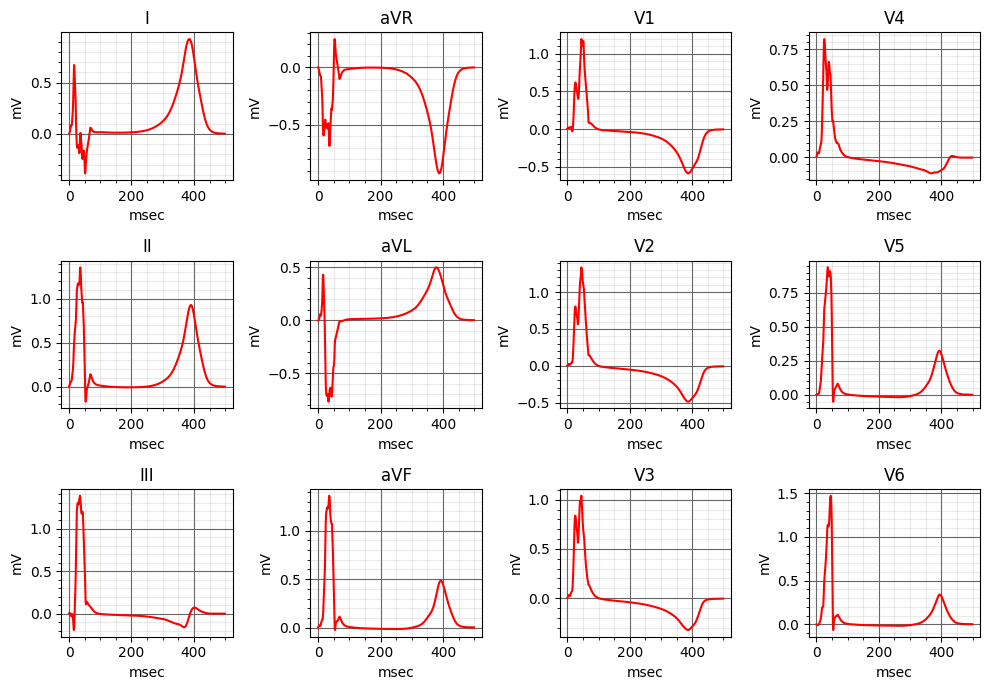

In [4]:
from matplotlib import pyplot as plt
test_idx = 50
X_clean = features[test_idx].T
# X_norm = norm_X[test_idx].T

row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display


for i in range(X_clean.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(X_clean[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()

In [5]:
    def train_test_split(X, y):
        # print(X[42])
        train_index = int(len(X) * .8)
        test_index = int(len(X) * .9)

        idxs = np.random.permutation(len(X))

        X = X[idxs]
        y = y[idxs]

        X_train = X[:train_index]
        y_train = y[:train_index]

        X_test = X[train_index:test_index]
        y_test = y[train_index:test_index]

        X_val = X[test_index:]
        y_val = y[test_index:]

        return X_train, y_train, X_test, y_test, X_val, y_val

In [6]:
X_train, y_train, X_test, y_test, X_val, y_val = train_test_split(features, targets)
# print(features.shape)

In [7]:
X_train_norm = normalize_X(X_train)
X_test_norm = normalize_X(X_test)
X_val_norm = normalize_X(X_val)

# y_train_norm = normalize_y(y_train)
# y_test_norm = normalize_y(y_test)
# y_val_norm = normalize_y(y_val)

In [8]:
print(f"training X shape{X_train_norm.shape}\ntesting X shape: {X_test_norm.shape}\nvalidating X shape{X_val_norm.shape}\n")
print(f"training y shape{y_train.shape}\ntesting y shape: {y_test.shape}\nvalidating y shape{y_val.shape}\n")

print(f"sum of X datasets equals number of samples: {X_train_norm.shape[0] + X_test_norm.shape[0] + X_val_norm.shape[0] == features.shape[0]}")
print(f"sum of y datasets equals number of samples: {y_train.shape[0] + y_test.shape[0] + y_val.shape[0] == targets.shape[0]}")

training X shape(12893, 12, 500)
testing X shape: (1612, 12, 500)
validating X shape(1612, 12, 500)

training y shape(12893, 75)
testing y shape: (1612, 75)
validating y shape(1612, 75)

sum of X datasets equals number of samples: True
sum of y datasets equals number of samples: True


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [10]:
class dataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        feature = torch.tensor(feature, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.float32)
        return feature, label

batch_size = 32

train_set = dataset(X_train_norm, y_train)
test_set = dataset(X_test_norm, y_test)
val_set = dataset(X_val_norm, y_val)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size,shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)

train_iter = iter(train_loader)
input, label = next(train_iter)
print(f"input shape: {input.shape}\nlabel shape: {label.shape}")

input shape: torch.Size([32, 12, 500])
label shape: torch.Size([32, 75])


In [11]:
#model class
class ECGNet(nn.Module):
    def __init__(self):
        super(ECGNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool1d(kernel_size=2,stride=2)
        self.batchnorm1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128,kernel_size=5,stride=1, padding=2)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(kernel_size=4,stride=4)
        self.conv4 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.batchnorm4 = nn.BatchNorm1d(256)
        self.drop = nn.Dropout(p=.4)
        self.fc1 = nn.Linear(7936, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128,75)

    def forward(self, x):
        x = self.pool(self.batchnorm1(F.relu(self.conv1(x))))
        x = self.pool2(self.batchnorm2(F.relu(self.conv2(x))))
        x = F.relu(self.batchnorm3((self.conv3(x))))
        x = self.pool3(self.batchnorm4(F.relu(self.conv4(x))))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.drop(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x


model = ECGNet()

# Dummy data for forward pass
dummy_input = torch.randn(32, 12, 500)
print(model.forward(dummy_input).shape)


torch.Size([32, 75])


In [12]:
# !pip install torchinfo

In [13]:
from torchinfo import summary

summary(model,input=(12,500))

Layer (type:depth-idx)                   Param #
ECGNet                                   --
├─Conv1d: 1-1                            1,952
├─MaxPool1d: 1-2                         --
├─BatchNorm1d: 1-3                       64
├─Conv1d: 1-4                            10,304
├─BatchNorm1d: 1-5                       128
├─MaxPool1d: 1-6                         --
├─Conv1d: 1-7                            41,088
├─BatchNorm1d: 1-8                       256
├─MaxPool1d: 1-9                         --
├─Conv1d: 1-10                           164,096
├─BatchNorm1d: 1-11                      512
├─Dropout: 1-12                          --
├─Linear: 1-13                           8,127,488
├─Linear: 1-14                           524,800
├─Linear: 1-15                           65,664
├─Linear: 1-16                           9,675
Total params: 8,946,027
Trainable params: 8,946,027
Non-trainable params: 0

In [58]:
#training loop
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100

# Check if CUDA is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move model to the device (GPU or CPU)

val_loss_arr = []
train_loss_arr = []
# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
        # Move data to the appropriate device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Print batch-level loss
        if (i + 1) % 200 == 0:  # Print every 200 batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {loss.item():.5f}")


    # Print epoch-level training loss
    epoch_loss = running_loss / len(train_loader)
    train_loss_arr.append(epoch_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Training Loss: {epoch_loss:.5f}")

    # Validation Phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation for validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()


    # Print epoch-level validation loss
    val_loss /= len(val_loader)
    val_loss_arr.append(val_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_loss:.5f}")

print("Training complete.")
# torch.save(model.state_dict(), 'model2_state.pth')

Epoch [1/100], Batch [200/403], Loss: 416.23297
Epoch [1/100], Batch [400/403], Loss: 298.00955
Epoch [1/100], Average Training Loss: 535.03005
Epoch [1/100], Validation Loss: 314.92265
Epoch [2/100], Batch [200/403], Loss: 279.02271
Epoch [2/100], Batch [400/403], Loss: 334.95901
Epoch [2/100], Average Training Loss: 307.79583
Epoch [2/100], Validation Loss: 297.82069
Epoch [3/100], Batch [200/403], Loss: 301.19141
Epoch [3/100], Batch [400/403], Loss: 247.44698
Epoch [3/100], Average Training Loss: 289.15016
Epoch [3/100], Validation Loss: 277.05772
Epoch [4/100], Batch [200/403], Loss: 284.32571
Epoch [4/100], Batch [400/403], Loss: 290.17554
Epoch [4/100], Average Training Loss: 269.94088
Epoch [4/100], Validation Loss: 255.30795
Epoch [5/100], Batch [200/403], Loss: 228.11195
Epoch [5/100], Batch [400/403], Loss: 271.43088
Epoch [5/100], Average Training Loss: 251.21653
Epoch [5/100], Validation Loss: 232.33085
Epoch [6/100], Batch [200/403], Loss: 228.37335
Epoch [6/100], Batch [

In [59]:
model.eval()  # Set model to evaluation mode
test_loss = 0.0
total_batches = len(test_loader)

pred = []
true = []

mae = nn.L1Loss(reduction='mean')
mae_test_loss = 0
with torch.no_grad():  # Disable gradient computation for testing
    for i, (inputs, labels) in enumerate(test_loader):
        # Move data to the appropriate device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        # pred.append(outputs)
        loss = criterion(outputs, labels)
        # true.append(labels)
        maes = mae(outputs, labels)
        # Accumulate the test loss
        test_loss += loss.item()
        mae_test_loss += maes.item()
        # Print batch-level details
        print(f"Batch [{i + 1}/{total_batches}], Loss: {loss.item():.4f}, MAE: {maes.item():.4f}")

# Calculate the average test loss
average_test_loss = test_loss / total_batches
average_mae_loss = mae_test_loss / total_batches

print(f"Average Test Loss: {average_test_loss:.4f}\nAverage MAE Loss: {average_mae_loss:.4f}")
# pred = model(X_test)
# true = y_test

Batch [1/51], Loss: 9.3234, MAE: 2.2476
Batch [2/51], Loss: 8.7380, MAE: 2.2634
Batch [3/51], Loss: 7.2805, MAE: 2.0275
Batch [4/51], Loss: 8.3314, MAE: 2.1623
Batch [5/51], Loss: 9.5998, MAE: 2.2750
Batch [6/51], Loss: 10.3873, MAE: 2.3141
Batch [7/51], Loss: 10.5633, MAE: 2.4020
Batch [8/51], Loss: 10.3593, MAE: 2.4536
Batch [9/51], Loss: 11.6334, MAE: 2.6064
Batch [10/51], Loss: 10.9866, MAE: 2.4365
Batch [11/51], Loss: 9.5263, MAE: 2.2852
Batch [12/51], Loss: 13.1029, MAE: 2.5203
Batch [13/51], Loss: 10.4905, MAE: 2.4391
Batch [14/51], Loss: 8.2108, MAE: 2.1916
Batch [15/51], Loss: 10.1627, MAE: 2.3713
Batch [16/51], Loss: 8.3495, MAE: 2.1994
Batch [17/51], Loss: 10.0943, MAE: 2.3893
Batch [18/51], Loss: 9.5503, MAE: 2.2967
Batch [19/51], Loss: 8.5050, MAE: 2.1882
Batch [20/51], Loss: 8.8991, MAE: 2.1894
Batch [21/51], Loss: 8.9210, MAE: 2.2967
Batch [22/51], Loss: 10.7310, MAE: 2.4699
Batch [23/51], Loss: 12.0399, MAE: 2.6467
Batch [24/51], Loss: 7.7540, MAE: 2.0723
Batch [25/51],

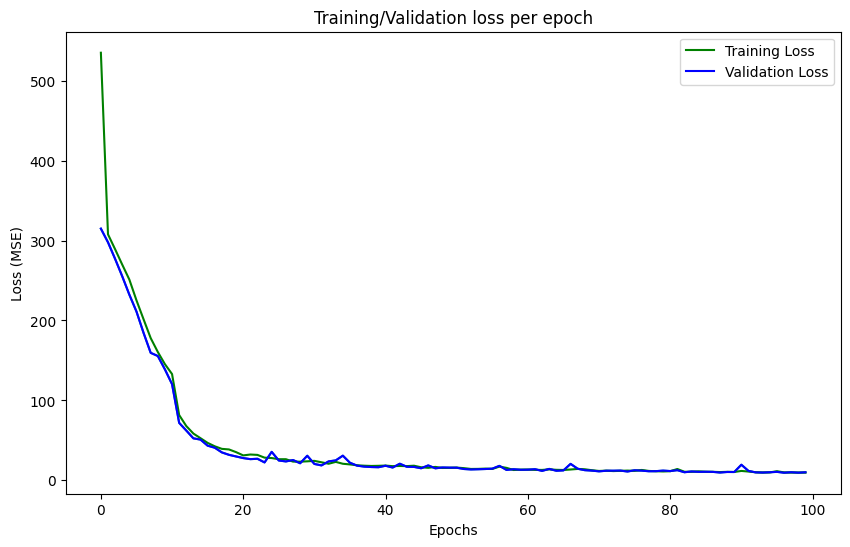

In [70]:
plt.figure(figsize = (10,6))
plt.plot(val_loss_arr)
plt.plot(range(len(train_loss_arr)), train_loss_arr, label='Training Loss', color='green')

# Plot validation loss
plt.plot(range(len(val_loss_arr)), val_loss_arr, label='Validation Loss',color='blue')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training/Validation loss per epoch')
plt.legend()
plt.savefig('train_v_loss_task3.png')
# plt.imshow(cmap='viridis')
plt.show()

# print(len(val_loss_arr))
from matplotlib import colormaps
# list(colormaps)

In [78]:
#saving model

# saved_model = ECGNet()
# PATH = 'models/model_state_dict.pt'
# PATH = 'models/model.pt'

# torch.save(model, PATH)

In [24]:
# using model to predict and plotting those predictions

test_iter = iter(test_loader)
testx, testy = next(test_iter)
predy = model(testx[4].reshape(1,12,500))
testy = testy[4].reshape(1,75)

In [25]:
import __main__
PATH = "./models/model.pt"
model = torch.load(PATH)
setattr(__main__, "ECGNet",model)

# testyy = model2(testx[0].reshape(1,12,500))

/var/folders/b8/l3nyhzgx34v0tz4w1c09sc280000gn/T/ipykernel_2791/694587656.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(PATH)


UnpicklingError: NEWOBJ class argument must be a type, not ECGNet

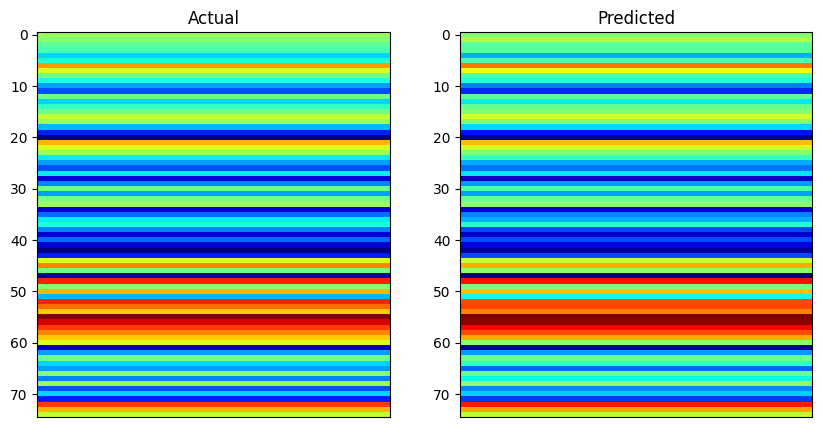

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(testy.T, cmap='jet', interpolation='nearest', aspect='auto')
ax1.set_title("Actual")
ax2.imshow(predy.T.detach().numpy(), cmap='jet', interpolation='nearest', aspect='auto')
ax2.set_title("Predicted")
# ax1.xticks([])
# ax2.xticks([])
plt.setp(plt.gcf().get_axes(), xticks=[])
plt.savefig("plots/actual_v_pred_t3")
plt.show()